#### https://www.kaggle.com/ydalat/titanic-a-step-by-step-intro-to-machine-learning

In [1]:
import pandas as pd # SQL like Features
import numpy as np # scientific computing 

import re
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py

In [2]:
from matplotlib import pyplot
py.init_notebook_mode(connected=True)

In [3]:
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

In [4]:
import xgboost as xgb
import seaborn as sns

In [5]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [6]:
from sklearn.svm import SVC , LinearSVC
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier, 
                              VotingClassifier
                             ) 

from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,learning_curve, train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [8]:
train_data = pd.read_csv('H:/all/train.csv')
test_data = pd.read_csv('H:/all/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
PassengerID = test_data['PassengerId']

In [10]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q


In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


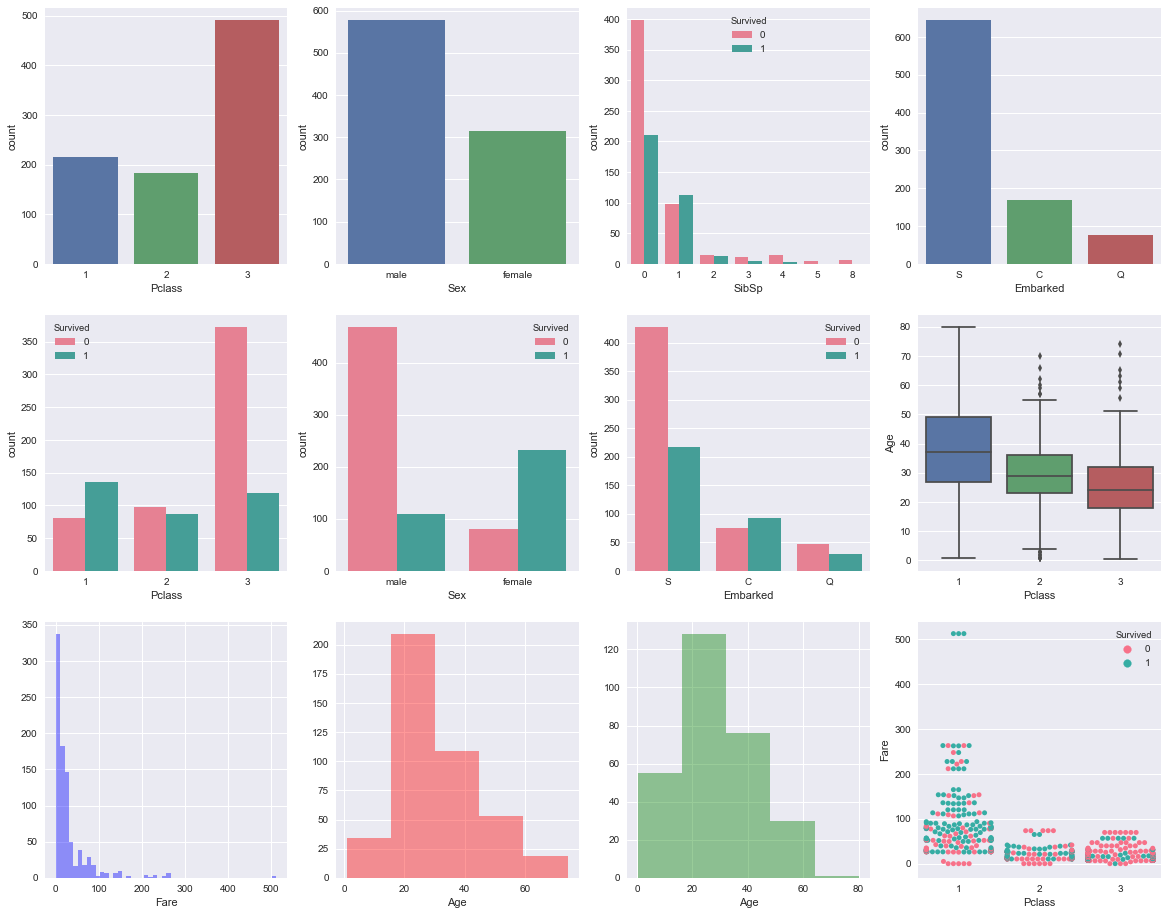

In [12]:
f , ax = plt.subplots(3,4 , figsize = (20,16))

sns.countplot('Pclass' , data = train_data , ax = ax[0,0])
sns.countplot('Sex' , data= train_data , ax = ax[0,1])


sns.countplot('SibSp', hue = 'Survived' , data = train_data, ax = ax[0,2], palette='husl')
sns.countplot('Embarked' , data = train_data , ax = ax[0,3])


sns.countplot('Pclass' , hue = 'Survived', data= train_data ,ax = ax[1,0] , palette='husl')
sns.countplot('Sex', hue = 'Survived' , data= train_data, ax = ax[1,1], palette='husl')
sns.countplot('Embarked' , hue = 'Survived' , data = train_data, ax = ax[1,2], palette='husl')



sns.boxplot(x='Pclass',y='Age',data=train_data,ax=ax[1,3])

sns.distplot(train_data['Fare'].dropna() , ax = ax[2,0], kde = False , color = 'b')
sns.distplot(train_data[train_data['Survived']==0]['Age'].dropna(), ax = ax[2,1], kde = False , color = 'r', bins =5)
sns.distplot(train_data[train_data['Survived']==1]['Age'].dropna(), ax= ax[2,2], kde =False , color = 'g', bins = 5)


sns.swarmplot(x = 'Pclass' , y = 'Fare' , hue = 'Survived' , data = train_data , palette='husl', ax = ax[2,3])


In [13]:
def detect_outliners( df , n , features ):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        
        IQR = Q3 - Q1
        outlier_step = 1.5*IQR
        outlier_list_col = df[(df[col]<Q1 - outlier_step)|(df[col] > Q3 +outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k , v in outlier_indices.items() if v > n )
    return multiple_outliers

Outliers_to_drop = detect_outliners(train_data , 2, ['Age','SibSp','Parch','Fare'])
train_data.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [14]:
train_data.info()
print('-'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [15]:
full_data = [ train_data, test_data]
Survival = train_data['Survived']
Survival.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

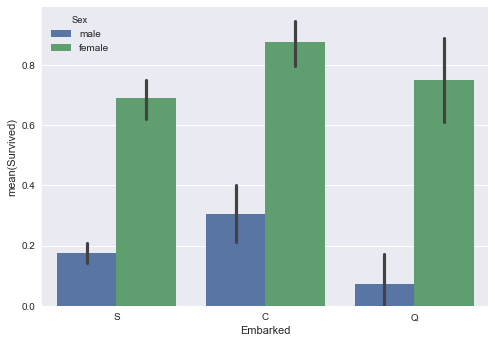

In [16]:
sns.barplot(x='Embarked' , y = 'Survived' , hue = 'Sex', data=train_data)

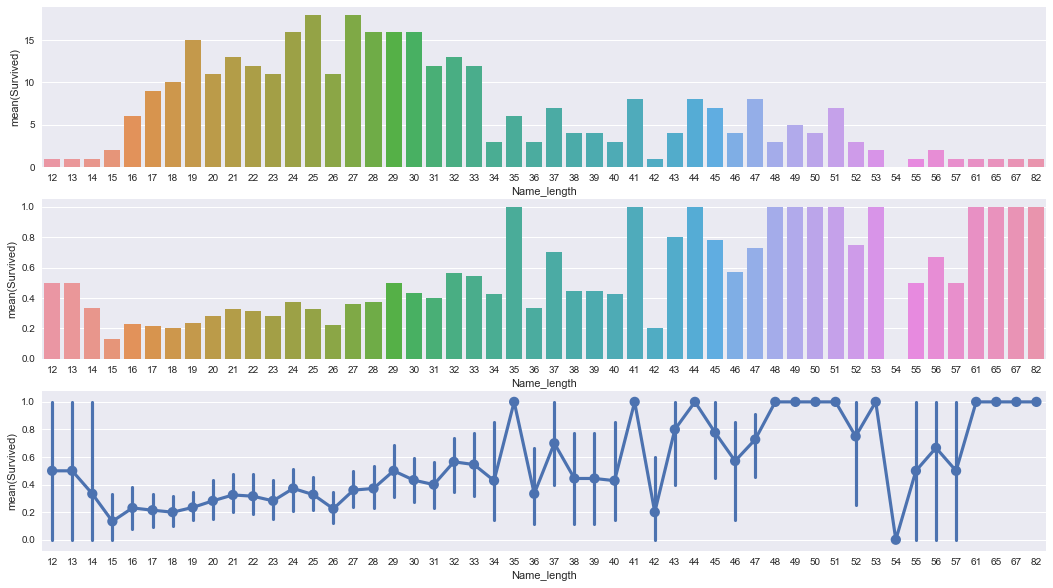

In [17]:
for dataset in full_data:
    dataset['Name_length'] =  train_data['Name'].apply(len)
    
    
sum_Name = train_data[['Name_length' , 'Survived']].groupby(['Name_length'], as_index=False).sum()
average_Name = train_data[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()

fig , ( ax1, ax2 , ax3 ) = plt.subplots(3,1,figsize=(18,10))

sns.barplot(x='Name_length', y= 'Survived' , data= sum_Name, ax = ax1 )
sns.barplot(x = 'Name_length', y = 'Survived', data= average_Name, ax= ax2)
sns.pointplot(x = 'Name_length',y = 'Survived', data= train_data, ax=ax3)

In [18]:
for dataset in full_data:
    dataset.loc[dataset['Name_length']<=23 , 'Name_length']=0
    dataset.loc[(dataset['Name_length']>23) & (dataset['Name_length']<=28),'Name_length']=1
    dataset.loc[(dataset['Name_length']>28)&  (dataset['Name_length']<=40),'Name_length']=2
    dataset.loc[(dataset['Name_length'])>40 , 'Name_length']=3
    
train_data['Name_length'].value_counts()

0    360
1    240
2    201
3     90
Name: Name_length, dtype: int64

In [19]:
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1}).astype(int)

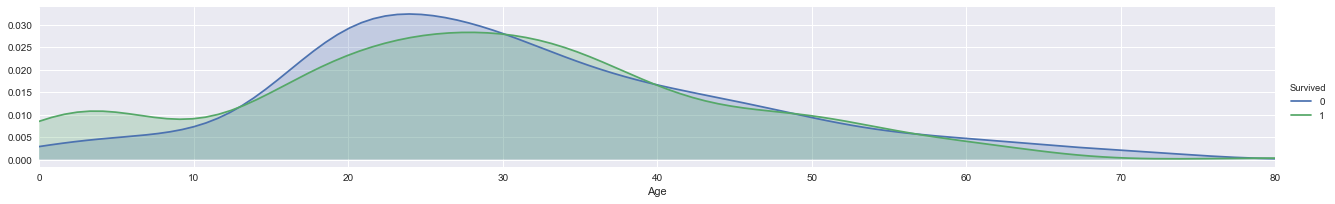

In [20]:
a = sns.FacetGrid(train_data , hue='Survived', aspect=6)   
a.map(sns.kdeplot , 'Age' , shade = True)
a.set(xlim = (0 , train_data['Age'].max()))
a.add_legend()

In [21]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_int = np.random.randint(age_avg-age_std,age_avg+age_std,size= age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_count
    dataset['Age'] = dataset['Age'].astype(int)
    
    dataset.loc[dataset['Age']<=14 , 'Age'] =0
    dataset.loc[(dataset['Age']>14) & (dataset['Age']<=30), 'Age']=5
    dataset.loc[(dataset['Age']>30) & (dataset['Age']<=40), 'Age'] =1
    dataset.loc[(dataset['Age']>40 )& (dataset['Age']<=50),'Age']=3
    dataset.loc[(dataset['Age']>50) & (dataset['Age']<=60),'Age']=2
    dataset.loc[(dataset['Age']>60 ),'Age']=4
    
train_data['Age'].value_counts()

5    333
4    199
1    155
3     84
0     78
2     42
Name: Age, dtype: int64

In [22]:
train_data[['Age','Survived']].groupby(['Age'],as_index=False).mean().sort_values(by='Survived',ascending = False)

,Age,Survived
0,0,0.576923
1,1,0.445161
2,2,0.404762
3,3,0.392857
5,5,0.363363
4,4,0.286432


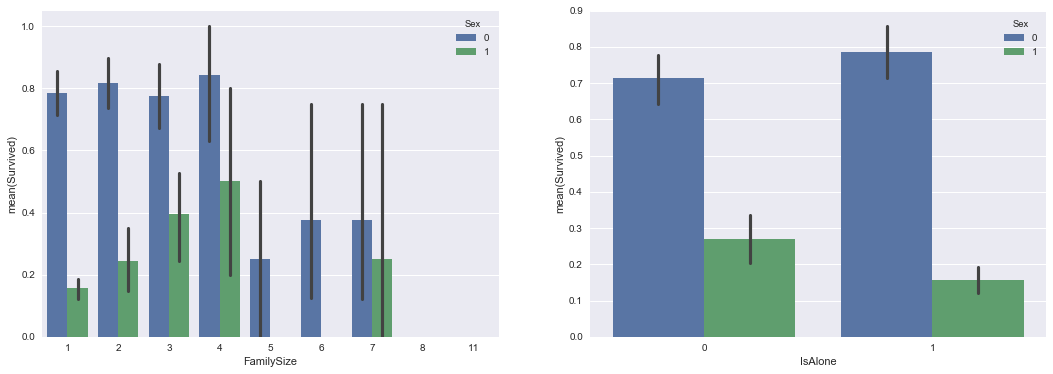

In [23]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1
    
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1 , 'IsAlone'] =1
    
    dataset['Boys'] = 0
    dataset.loc[(dataset['Age']==0) &(dataset['Sex']==1),'Boys'] =1
    
fig , (ax1 , ax2 ) = plt.subplots(1,2 , figsize=(18,6))
sns.barplot(x = 'FamilySize' , y = 'Survived',hue = 'Sex', data=train_data, ax = ax1)
sns.barplot(x = 'IsAlone', y = 'Survived', hue ='Sex', data= train_data, ax = ax2)

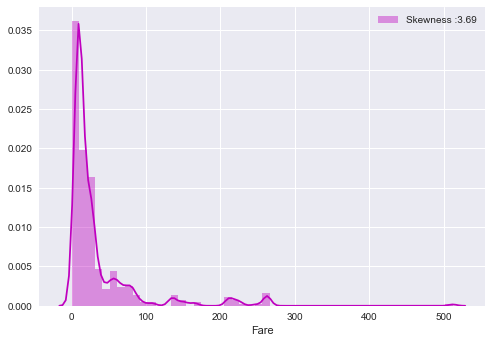

In [24]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_data['Fare'].median())

g = sns.distplot(dataset['Fare'], color = 'm', label ='Skewness :%.2f'%(dataset['Fare'].skew()))
g = g.legend(loc = 'best')

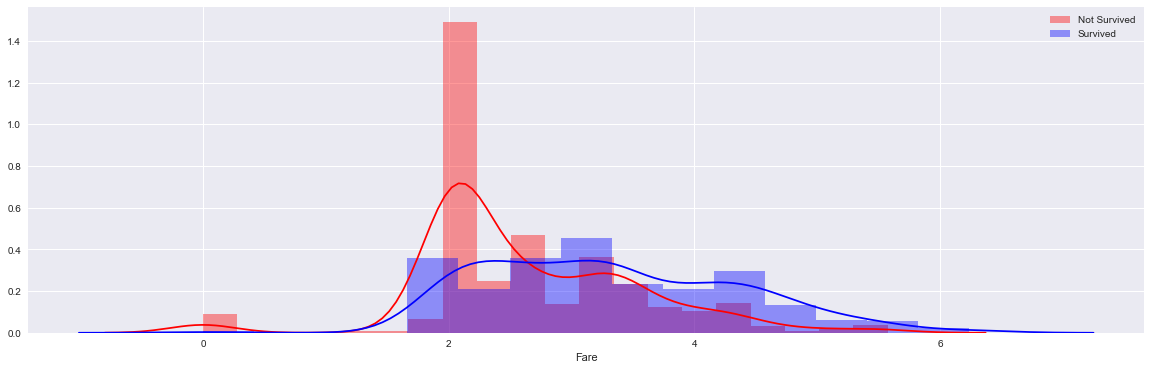

In [25]:
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
a4_dims = (20, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.distplot(train_data["Fare"][train_data["Survived"] == 0], color="r", label="Skewness : %.2f"%(train_data["Fare"].skew()), ax=ax)
g = sns.distplot(train_data["Fare"][train_data["Survived"] == 1], color="b", label="Skewness : %.2f"%(train_data["Fare"].skew()))

g = g.legend(["Not Survived","Survived"])

In [26]:
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 2.7, 'Fare'] = 0
    dataset.loc[ dataset['Fare'] > 2.7, 'Fare']  = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train_data['Fare'].value_counts()

0    457
3    434
Name: Fare, dtype: int64

In [27]:
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

train_data[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
0,0,206
1,1,136


In [28]:
train_data[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


In [29]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_pivot = pd.pivot_table(train_data, values= 'Survived',index=['Embarked'],columns='Pclass',aggfunc=np.mean, margins=True)

def color_negative_red(val):
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

Pclass,1,2,3,All
Embarked,,,,
0,0.589147,0.463415,0.189802,0.339009
1,0.694118,0.529412,0.378788,0.553571
2,0.5,0.666667,0.375,0.38961
All,0.62963,0.472826,0.242363,0.383838


In [30]:
dataset['Embarked']  = dataset['Embarked'].replace(['0','2'],'0')
train_data['Fare'].value_counts()

0    457
3    434
Name: Fare, dtype: int64

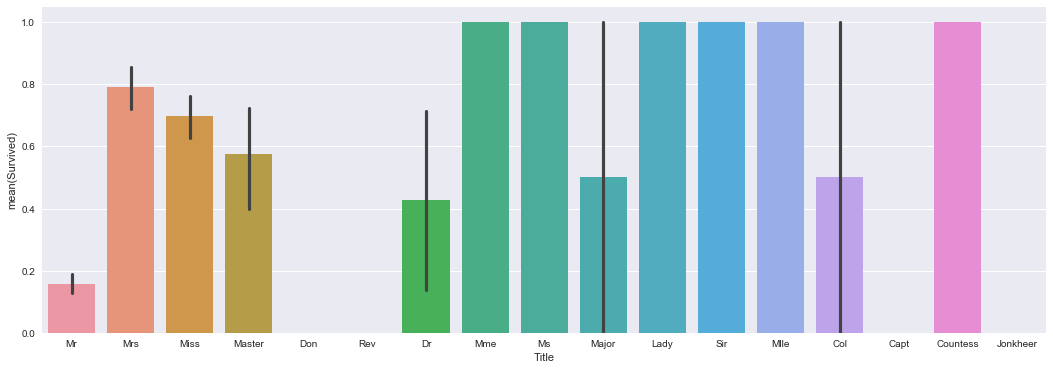

In [33]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.',name)
    
    if title_search:
        return title_search.group(1)
    return''

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    
fig , axis1 = plt.subplots( 1, figsize=(18,6))
sns.barplot(x = 'Title', y = 'Survived', data=train_data, ax = axis1)

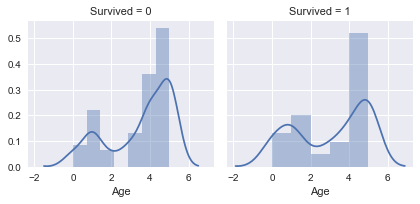

In [34]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Mrs', 'Miss'], 'MM')
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col'], 'DMC')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Capt', 'Jonkheer'],'DRCJ')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'Countess'],'MMLSMC' )
    title_mapping = {"MM": 1, "Master":2, "Mr": 5, "DMC": 4, "DRCJ": 3, "MMLSMC": 0}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(3)
    
g = sns.FacetGrid(train_data, col='Survived')
g = g.map(sns.distplot, "Age")

In [36]:
train_data[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
0,0,1.000000
1,1,0.736156
2,2,0.575000
4,4,0.454545
5,5,0.156673
3,3,0.000000


In [37]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 
    
train_data['Deck'].value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

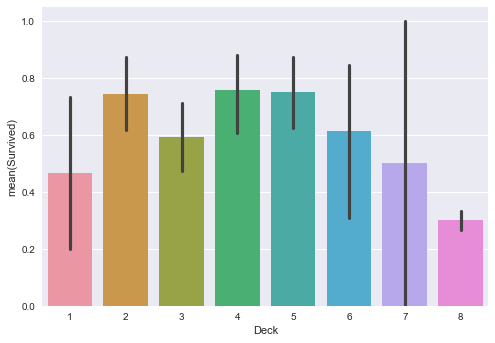

In [39]:
sns.barplot(x = 'Deck', y = 'Survived', order=[1,2,3,4,5,6,7,8], data=train_data)

In [40]:
for dataset in full_data:
    dataset.loc[ dataset['Deck'] <= 1, 'Deck'] = 1
    dataset.loc[(dataset['Deck'] > 1) & (dataset['Deck'] <= 6), 'Deck']  = 3
    dataset.loc[ dataset['Deck'] > 6, 'Deck'] = 0
train_data[["Deck", "Survived"]].groupby(['Deck'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Deck,Survived
2,3,0.690217
1,1,0.437500
0,0,0.301013


In [41]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
0,892,3,"Kelly, Mr. James",1,1,0,0,330911,0,U0,2,0,1,1,0,0,5.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,3,1,0,363272,0,U0,0,3,2,0,0,0,1.0,0
2,894,2,"Myles, Mr. Thomas Francis",1,4,0,0,240276,0,U0,2,0,1,1,0,0,5.0,0
3,895,3,"Wirz, Mr. Albert",1,5,0,0,315154,0,U0,0,3,1,1,0,0,5.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,5,1,1,3101298,0,U0,0,1,3,0,0,0,1.0,0


In [43]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,5,1,0,A/5 21171,0,U0,0,0,2,0,0,0,5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,3,C85,1,3,2,0,0,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,5,0,0,STON/O2. 3101282,0,U0,0,0,1,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,3,C123,0,3,2,0,0,1,1,3
4,5,0,3,"Allen, Mr. William Henry",1,1,0,0,373450,0,U0,0,1,1,1,0,0,5,0


In [45]:
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,FamilySize,IsAlone,Boys,Has_Cabin,Title,Deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,3.313131,0.523008,0.381594,1.461279,0.361392,1.023569,1.904602,0.602694,0.043771,0.228956,3.415264,0.637486
std,257.353842,0.486592,0.836071,0.477990,1.776133,1.102743,0.806057,1.500342,0.635673,1.016993,1.613459,0.489615,0.204700,0.420397,1.912805,1.213180
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,5.000000,1.000000,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,5.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,5.000000,8.000000,6.000000,3.000000,2.000000,3.000000,11.000000,1.000000,1.000000,1.000000,5.000000,3.000000


In [46]:
train_data[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'FamilySize', 'Title', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,2.531876,0.852459,3.491803,0.329690,1.125683,0.307832,0.123862,1.883424,4.273224
1,1,1.950292,0.318713,3.026316,0.464912,2.000000,0.447368,0.397661,1.938596,2.038012


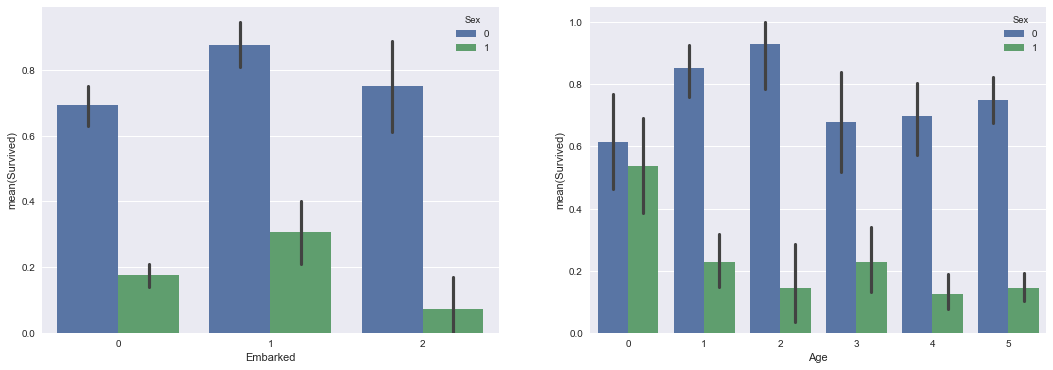

In [47]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_data, ax = axis1);
sns.barplot(x="Age", y="Survived", hue="Sex", data=train_data, ax = axis2);

In [48]:
train_data[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [49]:
for dataset in full_data:
    dataset['Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==0), 'Gender_Embarked'] = 0
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==2), 'Gender_Embarked'] = 1
    dataset.loc[(dataset['Sex']==0) & (dataset['Embarked']==1), 'Gender_Embarked'] = 2
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==2), 'Gender_Embarked'] = 3
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==0), 'Gender_Embarked'] = 4
    dataset.loc[(dataset['Sex']==1) & (dataset['Embarked']==1), 'Gender_Embarked'] = 5
train_data[["Gender_Embarked", "Survived"]].groupby(['Gender_Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Gender_Embarked,Survived
2,2,0.876712
1,1,0.750000
0,0,0.692683
5,5,0.305263
4,4,0.174603
3,3,0.073171


In [50]:
train_pivot = pd.pivot_table(train_data, values= 'Survived',index=['Title', 'Pclass'],columns='Sex',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

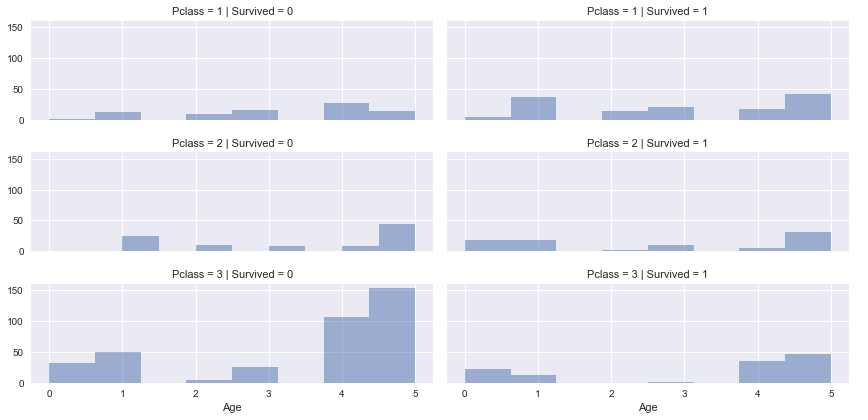

In [51]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2, aspect=3)
grid.map(plt.hist, 'Age', alpha=.5, bins=8)
grid.add_legend();

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

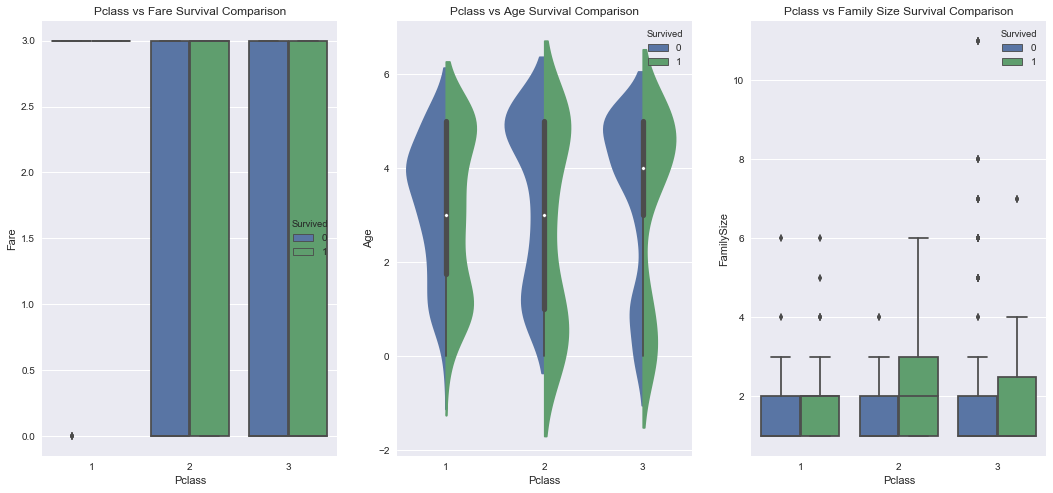

In [52]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(18,8))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train_data, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train_data, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = train_data, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

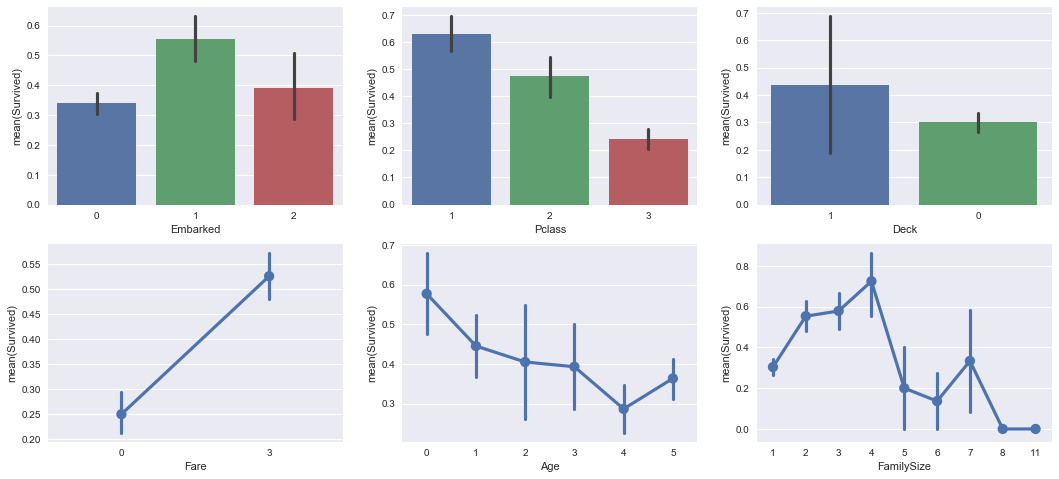

In [53]:

fig, saxis = plt.subplots(2, 3,figsize=(18,8))

sns.barplot(x = 'Embarked', y = 'Survived', data=train_data, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train_data, ax = saxis[0,1])
sns.barplot(x = 'Deck', y = 'Survived', order=[1,0], data=train_data, ax = saxis[0,2])

sns.pointplot(x = 'Fare', y = 'Survived',  data=train_data, ax = saxis[1,0])
sns.pointplot(x = 'Age', y = 'Survived',  data=train_data, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=train_data, ax = saxis[1,2])

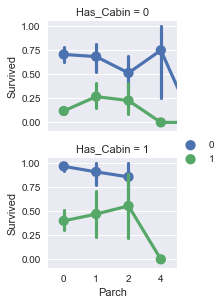

In [54]:
grid = sns.FacetGrid(train_data, row='Has_Cabin', size=2.2, aspect=1.2)
grid.map(sns.pointplot, 'Parch', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [55]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Boys', 'IsAlone', 'Embarked']

train = train_data.drop(drop_elements, axis = 1)
test  = test_data.drop(drop_elements, axis = 1)


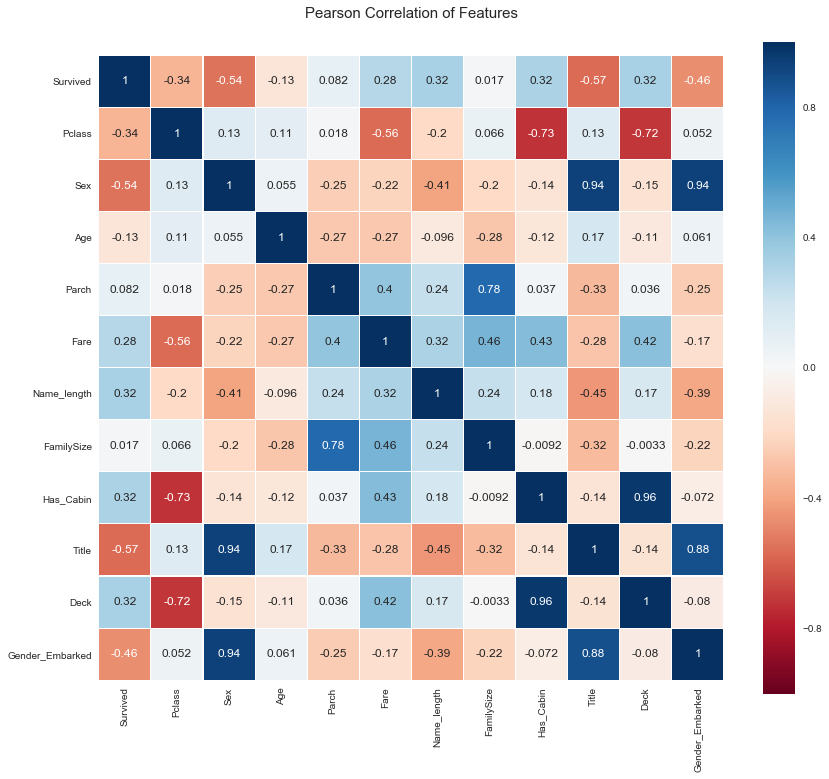

In [56]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

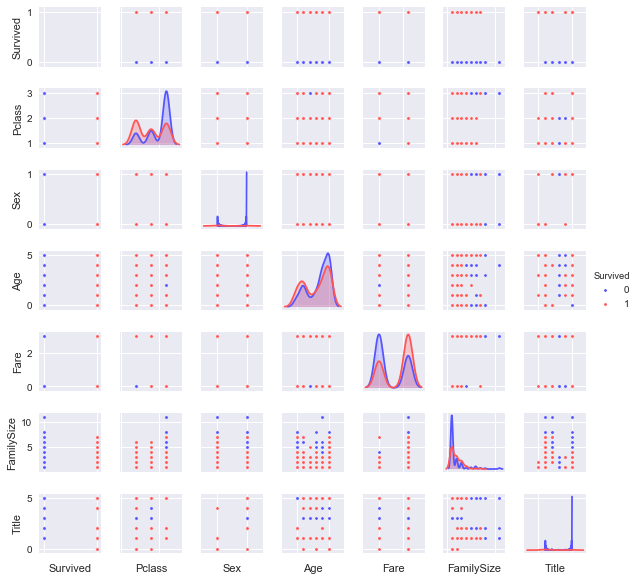

In [57]:
g = sns.pairplot(train[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare',u'FamilySize', u'Title']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [58]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_train.shape, Y_train.shape, test.shape

X_test = test.copy()

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train , Y_train)
acc_log = round(logreg.score(X_train, Y_train)*100,2)
acc_log

82.939999999999998

In [60]:
svc = SVC()
svc.fit(X_train, Y_train)

acc_svc = round(svc.score(X_train , Y_train)*100,2)
acc_svc

84.959999999999994

In [63]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26 , metric = 'minkowski',metric_params=None , n_jobs = 1 , n_neighbors=10 , p=2 , weights='uniform')
knn.fit(X_train , Y_train)
knn_predictions = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train)*100,2)
test_Survived = pd.Series(knn_predictions , name = 'Survived')

Submission1 = pd.concat([PassengerID,test_Survived],axis=1)



acc_knn

84.060000000000002

In [64]:
Submission1.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


[9, 0.81694915254237288]


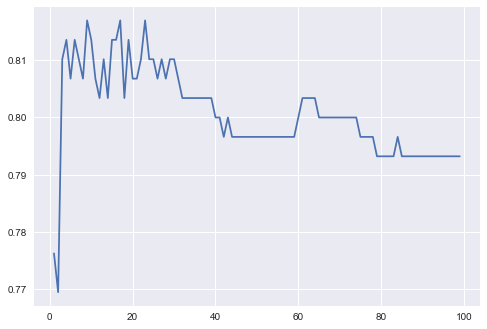

In [65]:
x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(X_train,Y_train,test_size = .33, random_state = 0)
nn_scores = []
best_prediction = [-1,-1]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski', p =2)
    knn.fit(x_trainknn, y_trainknn)
    score = accuracy_score(y_testknn, knn.predict(x_testknn))
    
    if score > best_prediction[1]:
        best_prediction = [i, score]
    nn_scores.append(score)
print (best_prediction)
plt.plot(range(1,100),nn_scores)

In [66]:
gaussian = GaussianNB()
gaussian.fit(X_train , Y_train)

acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

78.340000000000003

In [67]:
perceptron = Perceptron()
perceptron.fit(X_train , Y_train)

acc_perceptron = round(perceptron.score(X_train , Y_train)*100,2)
acc_perceptron

80.25

In [68]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100,2)
acc_linear_svc

82.939999999999998

In [69]:
sgd = SGDClassifier()
sgd.fit(X_train , Y_train)

acc_sgd = round(sgd.score(X_train, Y_train)*100,2)
acc_sgd

75.980000000000004

In [70]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train , Y_train)

acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)
acc_decision_tree

91.689999999999998

In [72]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train ,Y_train )


random_forest_predictions = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train)*100,2)
acc_random_forest




test_Survived = pd.Series(random_forest_predictions, name = 'Survived')
Submission2 = pd.concat([PassengerID, test_Survived],axis=1)
Submission2.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


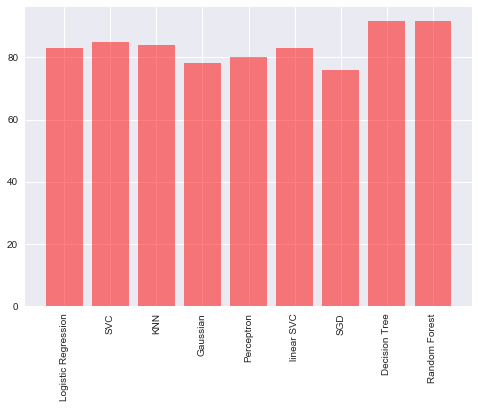

In [73]:
objects = ('Logistic Regression', 'SVC', 'KNN', 'Gaussian', 'Perceptron', 'linear SVC', 'SGD', 'Decision Tree', 'Random Forest')
x_pos = np.arange(len(objects))

accuracies1 = [acc_log , acc_svc , acc_knn , acc_gaussian,acc_perceptron, acc_linear_svc,acc_sgd,acc_decision_tree,acc_random_forest]

plt.bar(x_pos , accuracies1 , align = 'center',alpha=0.5,color='r')
plt.xticks(x_pos,objects,rotation='vertical')
plt.show()

In [79]:
from  sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10)
random_state = 2

classifiers = []
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())


classifiers.append(Perceptron(random_state=random_state))
classifiers.append(LinearSVC(random_state=random_state))

classifiers.append(SGDClassifier(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state= random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append( cross_val_score(classifier , X_train ,y = Y_train,scoring = 'accuracy',cv=kfold,n_jobs = 4 ))

cv_means = []
cv_std = []


for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['Logistic Regression',  'KNN', 'Gaussian',
    'Perceptron', 'linear SVC', 'SGD', 'Decision Tree','SVMC', 'Random Forest']})
    


,Algorithm,CrossValMeans,CrossValerrors
0,Logistic Regression,0.817062,0.032500
1,KNN,0.820433,0.028317
2,Gaussian,0.809246,0.039604
3,Perceptron,0.780057,0.024343
4,linear SVC,0.707048,0.122330
5,SGD,0.829384,0.028819
6,Decision Tree,0.725073,0.057945
7,SVMC,0.777797,0.029830
8,Random Forest,0.801431,0.038079


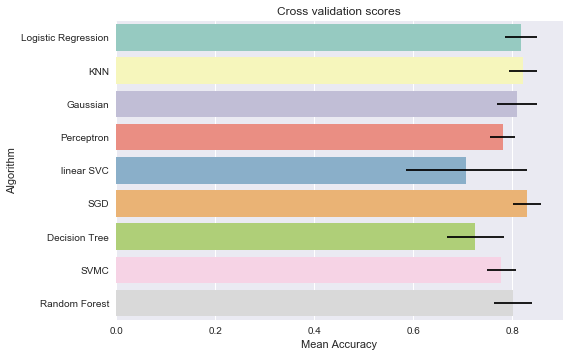

In [81]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [82]:
DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC, random_state=7)
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[50,100],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)
adaDTC_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:  3.3min finished


0.79573512906846244

In [83]:
ExtC = ExtraTreesClassifier()
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[300,600],
              "criterion": ["gini"]}
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   35.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  6.8min finished


0.82491582491582494

In [84]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   26.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   51.2s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  1.3min finished


0.8204264870931538

In [85]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1,10,50,100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(X_train,Y_train)
SVMC_best = gsSVMC.best_estimator_
# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   37.4s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  1.1min finished


0.83277216610549942

In [86]:
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[300,600],
              "criterion": ["gini"]}
gsrandom_forest = GridSearchCV(random_forest,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsrandom_forest.fit(X_train,Y_train)
# Best score
random_forest_best = gsrandom_forest.best_estimator_
gsrandom_forest.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   40.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  7.8min finished


0.82491582491582494

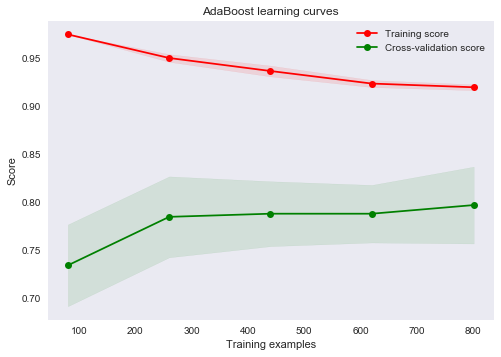

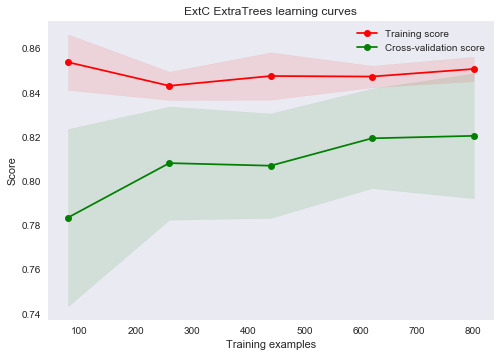

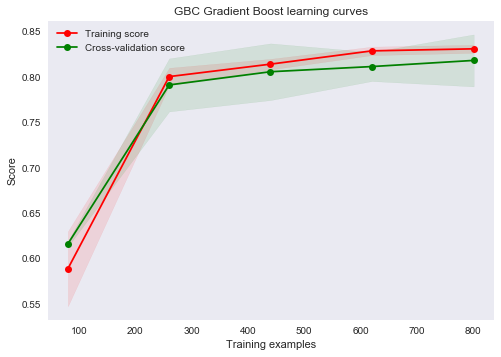

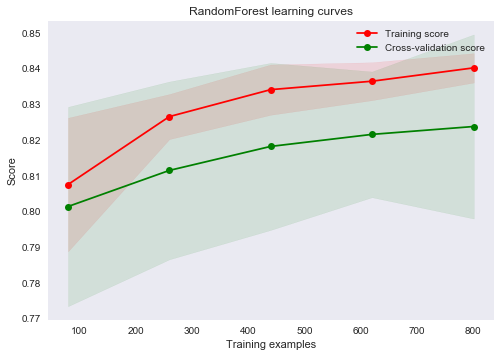

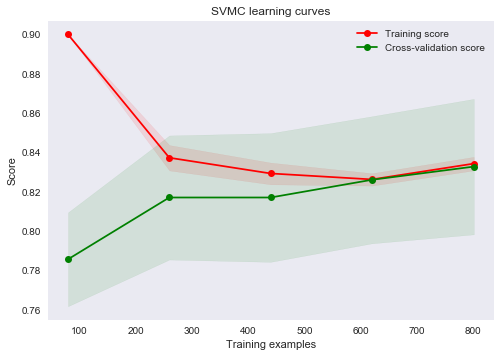

In [87]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtC ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GBC Gradient Boost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsrandom_forest.best_estimator_,"RandomForest learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVMC learning curves",X_train,Y_train,cv=kfold)

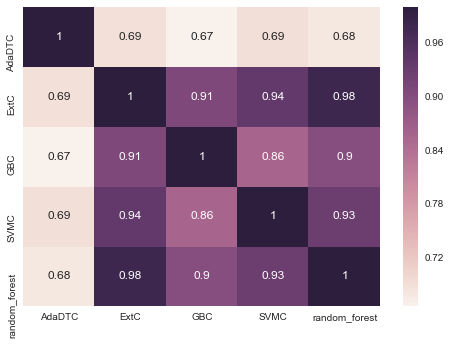

In [90]:
test_Survived_AdaDTC = pd.Series(adaDTC_best.predict(X_test), name="AdaDTC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(X_test), name="SVMC")
test_Survived_random_forest = pd.Series(random_forest_best.predict(X_test), name="random_forest")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_AdaDTC, test_Survived_ExtC, test_Survived_GBC,test_Survived_SVMC,test_Survived_random_forest],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

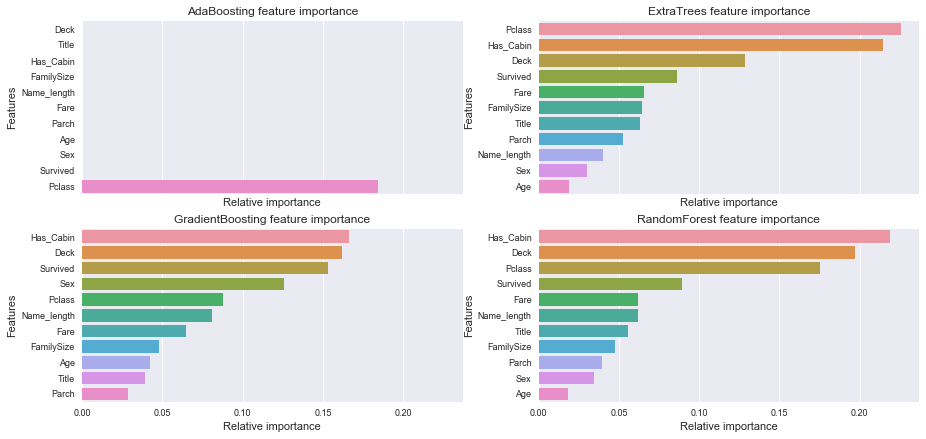

In [88]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,7))
names_classifiers = [("AdaBoosting", adaDTC_best),("ExtraTrees",ExtC_best),
("GradientBoosting",GBC_best), ("RandomForest",random_forest_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=11)
        g.set_ylabel("Features",fontsize=11)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [93]:
VotingPredictor = VotingClassifier(estimators=[('ExtC', ExtC_best), ('GBC',GBC_best),
('SVMC', SVMC_best), ('random_forest', random_forest_best)], voting='soft', n_jobs=4)
VotingPredictor = VotingPredictor.fit(X_train, Y_train)
VotingPredictor_predictions = VotingPredictor.predict(test)
test_Survived = pd.Series(VotingPredictor_predictions, name="Survived")

# Preparing data for Submission 3
test_Survived = pd.Series(VotingPredictor_predictions, name="Survived")
Submission3 = pd.concat([ PassengerID   ,  test_Survived],axis=1)
Submission3.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [94]:
Submission3.to_csv("StackingSubmission.csv", index=False)
print("Completed.")

Completed.
